In [7]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt

dtype = torch.FloatTensor

# 3 Words Sentence
sentences = [ "i like dog", "i like cat", "i like animal",
              "dog cat animal", "apple cat dog like", "dog fish milk like",
              "dog cat eyes like", "i like apple", "apple i hate",
              "apple i movie book music like", "cat dog hate", "cat dog like"]

word_sequence = " ".join(sentences).split()
word_list = " ".join(sentences).split()
word_list = list(set(word_list))
word_dict = {w: i for i, w in enumerate(word_list)}

print('word_sequence=',word_sequence)
print(' word_list=',word_list)
print(' word_dict=',word_dict)
print(len(word_list))

word_sequence= ['i', 'like', 'dog', 'i', 'like', 'cat', 'i', 'like', 'animal', 'dog', 'cat', 'animal', 'apple', 'cat', 'dog', 'like', 'dog', 'fish', 'milk', 'like', 'dog', 'cat', 'eyes', 'like', 'i', 'like', 'apple', 'apple', 'i', 'hate', 'apple', 'i', 'movie', 'book', 'music', 'like', 'cat', 'dog', 'hate', 'cat', 'dog', 'like']
 word_list= ['movie', 'dog', 'hate', 'i', 'animal', 'eyes', 'cat', 'music', 'fish', 'book', 'milk', 'like', 'apple']
 word_dict= {'movie': 0, 'dog': 1, 'hate': 2, 'i': 3, 'animal': 4, 'eyes': 5, 'cat': 6, 'music': 7, 'fish': 8, 'book': 9, 'milk': 10, 'like': 11, 'apple': 12}
13


In [15]:

def random_batch(data, size):
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(data)), size, replace=False)

    for i in random_index:
        random_inputs.append(np.eye(voc_size)[data[i][0]])  # target
        random_labels.append(data[i][1])  # context word
        print(data[i])

    return random_inputs, random_labels
    
    
    
    
# Word2Vec Parameter
batch_size = 20  # To show 2 dim embedding graph
embedding_size = 2  # To show 2 dim embedding graph
voc_size = len(word_list)       #13



# Make skip gram of one size window
skip_grams = []
print('word_sequence=',word_sequence)
#['i', 'like', 'dog', 'i', 'like', 'cat', 'i', 'like', 'animal', 'dog', 'cat', 'animal', 'apple', 'cat', 'dog', 'like', 'dog', 'fish', 'milk', 'like', 'dog', 'cat', 'eyes', 'like', 'i', 'like', 'apple', 'apple', 'i', 'hate', 'apple', 'i', 'movie', 'book', 'music', 'like', 'cat', 'dog', 'hate', 'cat', 'dog', 'like']
for i in range(1, len(word_sequence) - 1):
    target = word_dict[word_sequence[i]]
    context = [word_dict[word_sequence[i - 1]], word_dict[word_sequence[i + 1]]]
    #context为target的前后单词

    for w in context:
        skip_grams.append([target, w])

print('skip_grams=',skip_grams)



word_sequence= ['i', 'like', 'dog', 'i', 'like', 'cat', 'i', 'like', 'animal', 'dog', 'cat', 'animal', 'apple', 'cat', 'dog', 'like', 'dog', 'fish', 'milk', 'like', 'dog', 'cat', 'eyes', 'like', 'i', 'like', 'apple', 'apple', 'i', 'hate', 'apple', 'i', 'movie', 'book', 'music', 'like', 'cat', 'dog', 'hate', 'cat', 'dog', 'like']
skip_grams= [[11, 3], [11, 1], [1, 11], [1, 3], [3, 1], [3, 11], [11, 3], [11, 6], [6, 11], [6, 3], [3, 6], [3, 11], [11, 3], [11, 4], [4, 11], [4, 1], [1, 4], [1, 6], [6, 1], [6, 4], [4, 6], [4, 12], [12, 4], [12, 6], [6, 12], [6, 1], [1, 6], [1, 11], [11, 1], [11, 1], [1, 11], [1, 8], [8, 1], [8, 10], [10, 8], [10, 11], [11, 10], [11, 1], [1, 11], [1, 6], [6, 1], [6, 5], [5, 6], [5, 11], [11, 5], [11, 3], [3, 11], [3, 11], [11, 3], [11, 12], [12, 11], [12, 12], [12, 12], [12, 3], [3, 12], [3, 2], [2, 3], [2, 12], [12, 2], [12, 3], [3, 12], [3, 0], [0, 3], [0, 9], [9, 0], [9, 7], [7, 9], [7, 11], [11, 7], [11, 6], [6, 11], [6, 1], [1, 6], [1, 2], [2, 1], [2, 6

In [17]:

# Model
class Word2Vec(nn.Module):
    def __init__(self):
        super(Word2Vec, self).__init__()

        # W and WT is not Traspose relationship
        self.W = nn.Parameter(-2 * torch.rand(voc_size, embedding_size) + 1).type(dtype) # voc_size > embedding_size Weight
        self.WT = nn.Parameter(-2 * torch.rand(embedding_size, voc_size) + 1).type(dtype) # embedding_size > voc_size Weight

    def forward(self, X):
        # print(X.size())              
        # X : [batch_size, voc_size]=(20,13)
        hidden_layer = torch.matmul(X, self.W) # hidden_layer =(d,v)*(v,b)=(d,b)= [batch_size, embedding_size]
        output_layer = torch.matmul(hidden_layer, self.WT) 
        # output_layer =(b,d)*(d,v)=(d,v)= [batch_size, voc_size]     输出为（d，v） 与y进行softmax
        return output_layer

model = Word2Vec()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training
for epoch in range(5000):

    input_batch, target_batch = random_batch(skip_grams, batch_size)

    input_batch = Variable(torch.Tensor(input_batch))         # input    ==>[batch_size, voc_size]=(20,13)
    target_batch = Variable(torch.LongTensor(target_batch))     #target_batch : [batch_size] (LongTensor, not one-hot)

    optimizer.zero_grad()
    output = model(input_batch) #(b,v)

    # output : [batch_size, voc_size],      target_batch : [batch_size] (LongTensor, not one-hot)
    loss = criterion(output, target_batch)
    if (epoch + 1)%1000 == 0:
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

    loss.backward()
    optimizer.step()
    


Epoch: 1000 cost = 2.484912


Epoch: 2000 cost = 1.837060


Epoch: 3000 cost = 1.788415


Epoch: 4000 cost = 1.930390


Epoch: 5000 cost = 1.831344


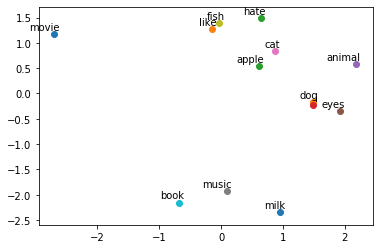

In [20]:
for i, label in enumerate(word_list):
    W, WT = model.parameters()
    x,y = float(W[i][0]), float(W[i][1])
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()